#Task:Perform ‘Exploratory Data Analysis’ on the provided dataset ‘SampleSuperstore’


In [1]:
#Import required libraries
import io
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
#Load Datasets
df = pd.read_csv(r'SampleSuperstore.csv')
df.head()


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
#To check shape of data
df.shape

(9994, 13)

In [5]:
#To remove Country coloumn
df1 = df.drop(['Country'], axis=1)


In [7]:
#After removing Country
df1.head()


,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [8]:
#To check null values
df1.isnull().sum()


Ship Mode       0
Segment         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [9]:
#Information about data
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 12 columns):
Ship Mode       9994 non-null object
Segment         9994 non-null object
City            9994 non-null object
State           9994 non-null object
Postal Code     9994 non-null int64
Region          9994 non-null object
Category        9994 non-null object
Sub-Category    9994 non-null object
Sales           9994 non-null float64
Quantity        9994 non-null int64
Discount        9994 non-null float64
Profit          9994 non-null float64
dtypes: float64(3), int64(2), object(7)
memory usage: 937.0+ KB


In [11]:
#To describe data
df1.describe ()


,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [12]:
#To check Ship mode types
df1['Ship Mode'].value_counts()


Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

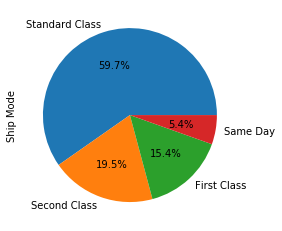

In [13]:
 #To make pie chart of ship mode
df1['Ship Mode'].value_counts().plot.pie(autopct="%1.1f%%")


In [14]:
#To see sub-category wise distribution
df1['Sub-Category'].value_counts(sort=False)


Storage         846
Art             796
Paper          1370
Bookcases       228
Phones          889
Binders        1523
Chairs          617
Accessories     775
Furnishings     957
Tables          319
Fasteners       217
Labels          364
Machines        115
Supplies        190
Appliances      466
Copiers          68
Envelopes       254
Name: Sub-Category, dtype: int64

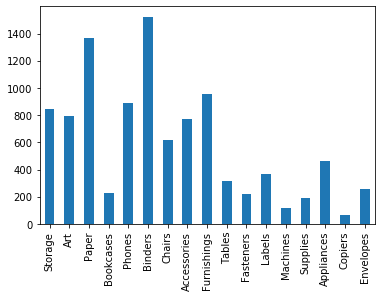

In [15]:
df1['Sub-Category'].value_counts(sort=False).plot(kind="bar")

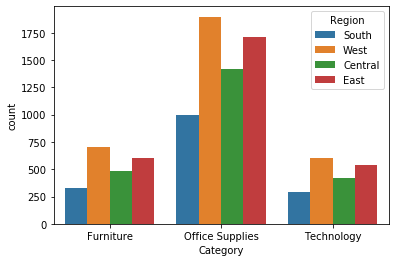

In [16]:
#To see Category-wise distribution of various regions
sns.countplot(x="Category", hue="Region", data=df1)


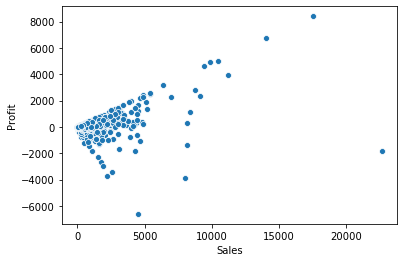

In [17]:
#We can draw scatterplot of sales and profit
sns.scatterplot("Sales",'Profit',data=df1)


In [19]:
#Top profitable cities
top=df1.groupby('City')['Profit'].sum().reset_index().sort_values(by='Profit',ascending=False)

top


,City,Profit
329,New York City,62036.9837
266,Los Angeles,30440.7579
452,Seattle,29156.0967
438,San Francisco,17507.3854
123,Detroit,13181.7908
233,Lafayette,10018.3876
215,Jackson,7581.6828
21,Atlanta,6993.6629
300,Minneapolis,6824.5846
437,San Diego,6377.1960


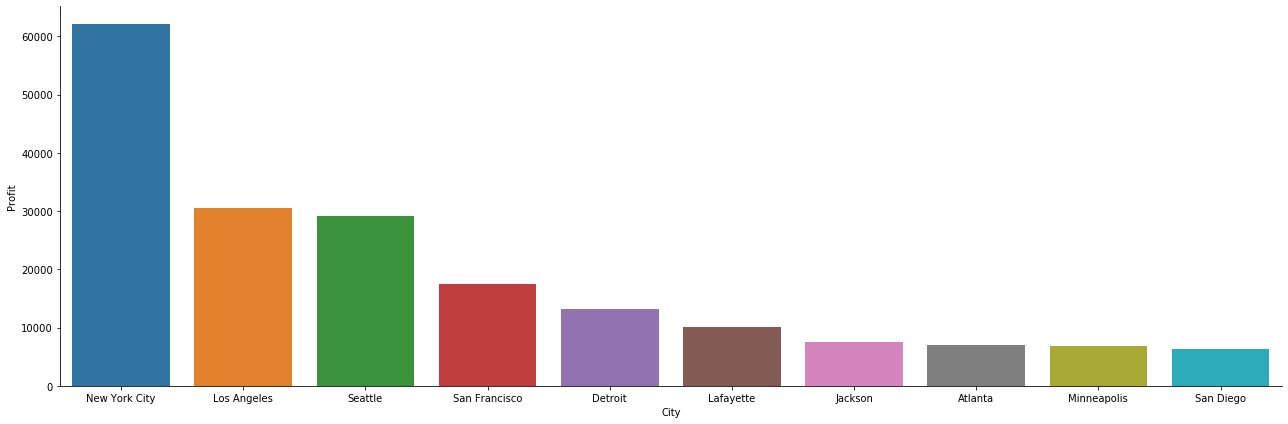

In [20]:
sns.catplot('City','Profit',data=top.head(10),kind='bar',height=6,aspect=3)

plt.show()


In [22]:
#Top Profitable Sub-Category
top_category = df1.groupby('Sub-Category')['Profit'].sum().reset_index().sort_values(by='Profit',ascending=False)

top_category


,Sub-Category,Profit
6,Copiers,55617.8249
13,Phones,44515.7306
0,Accessories,41936.6357
12,Paper,34053.5693
3,Binders,30221.7633
5,Chairs,26590.1663
14,Storage,21278.8264
1,Appliances,18138.0054
9,Furnishings,13059.1436
7,Envelopes,6964.1767


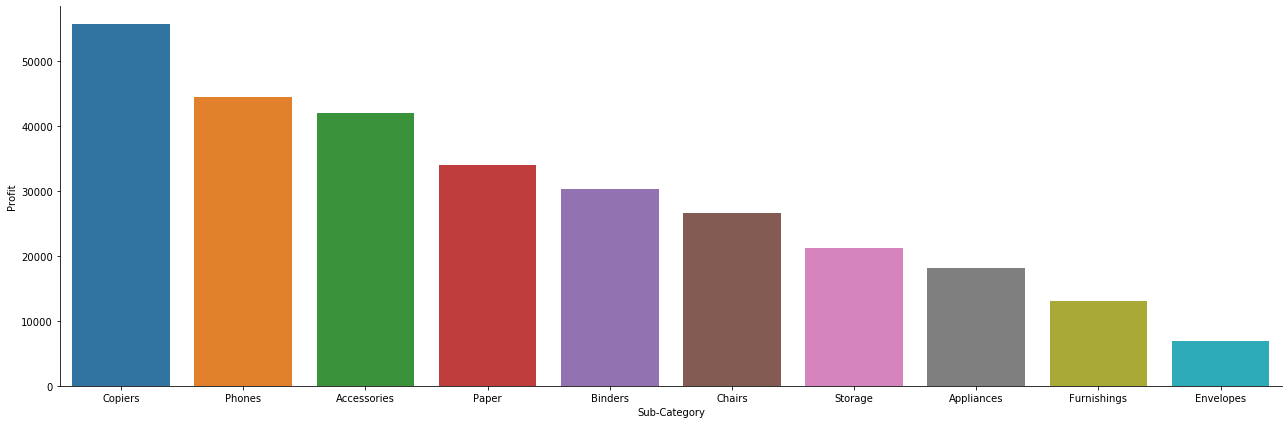

In [23]:
sns.catplot(x='Sub-Category',y='Profit',data=top_category.head(10),kind=
'bar',height=6,aspect=3)
